In [11]:
import pandas as pd
import numpy as np
import time
import test_PartA as pa
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Dataset/winequality-white.csv',sep = ';')

In [13]:
# “good” (quality > 5) & “bad” (quality <= 5)
df['quality'] = (df['quality'] > 5).astype(int)

In [14]:
# Rename quality to y
df = df.rename(columns={'quality':'y'})

In [15]:
df = df.sample(frac=1) 

In [16]:
y = df['y'] # Target vector
X =  df.drop(columns=['y'])#Design Matrix


In [17]:
best_features_accuracy_f1 = ['volatile acidity', 'citric acid', 'residual sugar', 'pH', 'sulphates',
       'alcohol']
best_features_accuracy = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df = df[best_features_accuracy]

In [18]:
y = df['y']
X = best_df
y = np.array(y)
#y = np.expand_dims(y,axis=1)  ######All performance function uses (n,) instead of (n,1)
X = np.array(X)

In [19]:
def partition(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [20]:
X_train, X_test, y_train, y_test = partition(X,y,t=0.2)

In [21]:
# k = 5 , p = 2 , wigthts = uniform
knn = pa.knnClassifier()
knn.fit(X_train,y_train,distance = 'Euclidean')
predB = knn.predict(X_test)

print('Performance Measure: Accuracy')
ac2 = pa.accuracy(predB,y_test)
ac2

Performance Measure: Accuracy


0.7479591836734694

In [22]:

print('Performance Measure: F1 Score')
ac1 = pa.compute_F1_score(predB,y_test)
ac1

Performance Measure: F1 Score


0.8166295471417966

In [23]:
knn = pa.knnClassifier()
knn.fit(X_train,y_train,distance = 'Euclidean',n_neighbours = 11)
predB = knn.predict(X_test)


print('Performance Measure: Accuracy')
ac2 = pa.accuracy(predB,y_test)
ac2

Performance Measure: Accuracy


0.7591836734693878

In [24]:

print('Performance Measure: F1 Score')
ac1 = pa.compute_F1_score(predB,y_test)
ac1

Performance Measure: F1 Score


0.8304597701149425

In [25]:
pred_test = knn.predict(X_test)
test_F1 = pa.compute_F1_score(pred_test,y_test)
test_precision = pa.compute_precision(pred_test,y_test)
test_recall = pa.compute_recall(pred_test,y_test)
test_confusion = pa.compute_confusion_matrix(pred_test,y_test)
test_accuracy = pa.accuracy(pred_test,y_test)
test_generr = pa.gen_error(pred_test,y_test)

In [26]:
print('Testing on Test DATA')
print('Precision :',test_precision)
print('Recall :',test_recall)
print('F1 Score :',test_F1)
print('\n\nConfusion Matrix :\n')
print(test_confusion)
print('\n\nAccuracy :',test_accuracy)
print('Gen Error :',test_generr)

Testing on Test DATA
Precision : 0.857566765578635
Recall : 0.8050139275766016
F1 Score : 0.8304597701149425


Confusion Matrix :

col_0    0    1
row_0          
0      166   96
1      140  578


Accuracy : 0.7591836734693878
Gen Error : 0.24081632653061225


In [174]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [175]:
knn = pa.knnClassifier()
knn.fit(X_train,y_train,distance = 'Euclidean')
predB = knn.predict(X_test)

print('Performance Measure: Accuracy')
ac2 = pa.accuracy(predB,y_test)
ac2

Performance Measure: Accuracy


0.753061224489796

In [176]:

print('Performance Measure: F1 Score')
ac1 = pa.compute_F1_score(predB,y_test)
ac1

Performance Measure: F1 Score


0.8180451127819549

In [27]:
knn = pa.knnClassifier()
knn.fit(X_train,y_train,distance = 'Euclidean',n_neighbours = 11,weights = 'distance')
predB = knn.predict(X_test)


print('Performance Measure: Accuracy')
ac2 = pa.accuracy(predB,y_test)
ac2

Performance Measure: Accuracy


0.8295918367346938

In [28]:
print('Performance Measure: F1 Score')
ac1 = pa.compute_F1_score(predB,y_test)
ac1

Performance Measure: F1 Score


0.8778346744696415

In [35]:
len(list(range(61)))

61

In [38]:
validation_accuracy = np.empty((59,2,2))
neighbors = list(range(60))[1:]
distance = ['Euclidean', 'Manhattan']
weights = ['uniform','distance']
maxScore = 0
for i,k in enumerate(neighbors):
    for j,dst in enumerate(distance):
        for x,wgt in enumerate(weights):
            knn = pa.knnClassifier()
            model_args = {'n_neighbours' : k,'weights':wgt,'distance' : dst}
            result = pa.sFold(5,X_train,y_train,knn,pa.compute_F1_score,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] > maxScore:
                maxScore = validation_accuracy[i,j,x]
                index = [i,j,x]

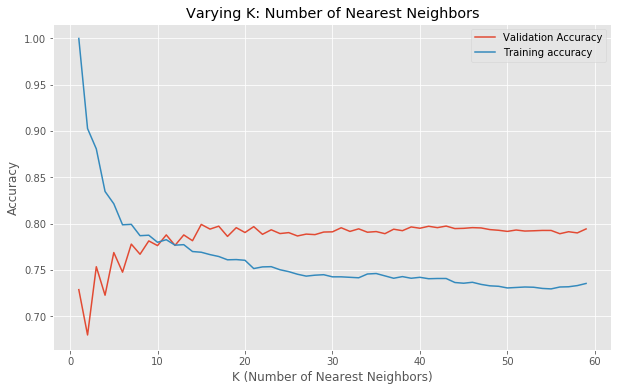

Optimal K:  15


In [42]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, validation_accuracy[:,0,0], label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()



# Find the value of "K" that gives max validation accuracy
j = 0
max_val_accuracy = validation_accuracy[j,0,0]
max_k = 1

for i in neighbors:
    if(validation_accuracy[j,0,0] > max_val_accuracy):
        max_val_accuracy = validation_accuracy[j,0,0]
        max_k = i
    j +=1
    
print("Optimal K: ", max_k)